# EDA

## Load and Inspect the Data

In [ ]:
import pandas as pd
import numpy as np
import zipfile

df = pd.read_excel('LabeledText.xlsx')


In [ ]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#keep only the columns we need
df=df[['Caption','LABEL']]

In [ ]:
# Print unique categories/labels in the dataset
print('Categories')
print(df.LABEL.unique())
print("-------------")

# Print a sample of the dataset
print('Dataset Sample')
df.head()


Categories
['negative' 'positive' 'neutral']
-------------
Dataset Sample


,Caption,LABEL
0,How I feel today #legday #jelly #aching #gym,negative
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral
4,Zoe's first love #Rattled @JohnnyHarper15,positive


# Data Cleansing

This section focuses on preparing the text data for analysis by performing various preprocessing steps. It includes tasks such as removing URLs, HTML tags, punctuation, numbers, and stop words, as well as expanding contractions and lemmatizing words. Additionally, it ensures consistency and standardization in the text data, which is essential for accurate and reliable natural language processing tasks, such as sentiment analysis.


In [ ]:
# Lowercase the data
df['text_cleaned'] = df['Caption'].apply(lambda x: x.lower())

In [ ]:
# !pip install lxml


import re
from bs4 import BeautifulSoup

# Removing URLs from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Removing HTML tags from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)

C:\Users\panka\AppData\Local\Temp\ipykernel_18276\3781325304.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)


In [ ]:
# Dictionary to convert common chat words to their full forms
#There are many more chat words that can be added to this dictionary. These are some common examples.
chat_words_dict = {
    "imo": "in my opinion",
     "cyaa": "see you",
    "idk": "I don't know",
    "rn": "right now",
    "afaik": "as far as I know",

}



In [ ]:
# Function that returns the text with chat words converted to their full forms

def convert_chat_words(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            converted_words.append(chat_words_dict[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text

In [ ]:
df['text_cleaned'] = df['text_cleaned'].apply(convert_chat_words)

In [ ]:
# Removing punctuation
import string
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Removing numbers
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))

# Removing extra spaces
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x.split()))

# Replacing repetitions of punctuation
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'(\W)\1+', r'\1', x))

In [ ]:
# Removing special characters
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

In [ ]:
# !pip install contractions

# Removing contractions
import contractions
# Remove contractions from the 'text_cleaned' column
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: contractions.fix(x))

In [ ]:
from nltk.tokenize import word_tokenize
# Tokenization
df['tokens'] = df['text_cleaned'].apply(lambda x: word_tokenize(x))

In [ ]:
# Removing stop words
from nltk.corpus import stopwords

# Loading English stop words
stop_words = set(stopwords.words('english'))

# Removing stop words from the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the updated 'tokens' column
df['tokens'].tail(20)

4849              [get, friday, night, look, sorted, newin, lbd, littleblackdress, strappy, plunge, neckline, mini, black, bodycon]
4850                                                                                         [rt, nneagoe, love, caring, beautiful]
4851               [february, winter, rainy, stormy, windy, wednesday, morning, love, happy, positive, passionate, reading, coffee]
4852    [rt, thatguykai, honored, pittsburgh, pirates, consultant, coachotip, speak, ball, club, passionate, relentless, ownership]
4853                                              [genghis, khan, ily, relatable, king, passionate, yeet, yas, sogengrn, apgenghis]
4854                 [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, fun, uk]
4855                  [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, coffee]
4856                                                   [rt, bishopcarrollhs,

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# POS tag mapping dictionary
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

# Function to perform Lemmatization on a text
def lemmatize_text(text):
    # Get the POS tags for the words
    pos_tags = nltk.pos_tag(text)

    # Perform Lemmatization
    lemmatized_words = []
    for word, tag in pos_tags:
        # Map the POS tag to WordNet POS tag
        pos = wordnet_map.get(tag[0].upper(), wordnet.NOUN)
        # Lemmatize the word with the appropriate POS tag
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        # Add the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words

# Apply Lemmatization to the 'tokens' column
df['tokens'] = df['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,Caption,LABEL,text_cleaned,tokens
0,How I feel today #legday #jelly #aching #gym,negative,how i feel today legday jelly aching gym,"[feel, today, legday, jelly, ache, gym]"
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative,arrivatw absolute disgrace two carriages from bangor half way there standing room only disgraced,"[arrivatw, absolute, disgrace, two, carriage, bangor, half, way, stand, room, disgrace]"
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive,this is my valentines from of my nephews i am elated sometimes the little things are the biggest best things,"[valentine, nephew, elate, sometimes, little, thing, big, best, thing]"
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral,betterfeelingfilms rt via instagram first day of filming powerless back in cannot,"[betterfeelingfilms, rt, via, instagram, first, day, film, powerless, back]"
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoes first love rattled johnnyharper,"[zoes, first, love, rattle, johnnyharper]"


# Train-Test split of dataset

In [ ]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(df.tokens, df.LABEL, test_size=0.3, random_state=12547392)

# Second split: 50% validation, 50% test of the remaining 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12547392)


In [ ]:
print(X_train.head())
print(y_train.head())

1807             [rt, dallasblackcom, horrible, news, los, angeles, today, regard, khloes, estrange, husband, lamar, odom]
1619                                                                                          [feel, desolate, take, quiz]
526     [rt, bosshogswife, duckcommanderkidsdevo, release, today, book, much, fun, read, kiddos, chryssymama, excite, htt]
915                                                                          [indias, modi, appal, temple, build, worship]
3485                                                      [photo, photographer, get, rumble, jungle, beat, stone, gorilla]
Name: tokens, dtype: object
1807    negative
1619    negative
526     positive
915     negative
3485     neutral
Name: LABEL, dtype: object


In [ ]:
# Printing the lengths of the training and validation sets

print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

3408 3408
730 730
731 731


In [ ]:
# Get mean and std of sequence length on trainning set
print(np.mean([len(x) for x in X_train]))
print(np.std([len(x) for x in X_train]))

8.541960093896714
3.610837223388305


# 1-Hot Vectors

In [ ]:
y_train_1_hot = pd.get_dummies(y_train).values.tolist()


#1-Hot to train set
for i in range(len(y_train_1_hot)):
    for j in range(3):
        if y_train_1_hot[i][j]==True:
            y_train_1_hot[i][j]=1
        else:
            y_train_1_hot[i][j]=0



#1-Hot to validation set
y_val_1_hot = pd.get_dummies(y_val).values.tolist()

for i in range(len(y_val_1_hot)):
    for j in range(3):
        if y_val_1_hot[i][j]==True:
            y_val_1_hot[i][j]=1
        else:
            y_val_1_hot[i][j]=0


#1-Hot to validation set
y_test_1_hot = pd.get_dummies(y_test).values.tolist()

for i in range(len(y_test_1_hot)):
    for j in range(3):
        if y_test_1_hot[i][j]==True:
            y_test_1_hot[i][j]=1
        else:
            y_test_1_hot[i][j]=0




for i,name in enumerate (pd.get_dummies(y_train).columns):
    print("Index:",i," Category: ",name)

print("-----------------------------------")

print("Label index: {} | 1-hot vector:  {}".format(y_train[0],
                                                   y_train_1_hot[0]))
print("Label index: {} | 1-hot vector:  {}".format(y_train[2],
                                                   y_train_1_hot[2]))
print("Label index: {} | 1-hot vector:  {}".format(y_train.iloc[-3],
                                                   y_train_1_hot[-3]))

Index: 0  Category:  negative
Index: 1  Category:  neutral
Index: 2  Category:  positive
-----------------------------------
Label index: negative | 1-hot vector:  [1, 0, 0]
Label index: positive | 1-hot vector:  [0, 0, 1]
Label index: neutral | 1-hot vector:  [0, 1, 0]


In [ ]:
# Convert y_train_1_hot from list to numpy array
y_train_1_hot = np.array(y_train_1_hot)
y_val_1_hot = np.array(y_val_1_hot)
y_test_1_hot = np.array(y_test_1_hot)

# Baseline (logistic regression)

In [ ]:
# Importing TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Use unigram & bi-gram tf*idf features
# max_features=6000: Limiting the maximum number of features to 6000
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 6000,
                             sublinear_tf=True)

# Transforming the tokenized text data into TF-IDF features for training set
X_train_tfidf = vectorizer.fit_transform([" ".join(x) for x in
                                          X_train])

# Transforming the tokenized text data into TF-IDF features for validation set
X_val_tfidf = vectorizer.transform([" ".join(x) for x in
                                    X_val])

# Transforming the tokenized text data into TF-IDF features for validation set
X_test_tfidf = vectorizer.transform([" ".join(x) for x in
                                    X_test])

print(X_train_tfidf.shape, type(X_train_tfidf))

(3408, 6000) <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
## Logistic Regression Without SVD

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train_tfidf, y_train)

predictions = clf.predict(X_test_tfidf)
# print(classification_report(y_val, predictions,
#                             target_names=df.LABEL))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.70      0.64      0.67       221
     neutral       0.61      0.66      0.63       273
    positive       0.74      0.73      0.73       237

    accuracy                           0.67       731
   macro avg       0.68      0.67      0.68       731
weighted avg       0.68      0.67      0.68       731



# Convert text (sequence of words) to sequence of indexes and PAD the sequences

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAX_WORDS = 100000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 300

vectorizer = TextVectorization(max_tokens=MAX_WORDS, output_mode='int', ngrams=1,
              output_sequence_length=MAX_SEQUENCE_LENGTH)

vectorizer.adapt([" ".join(x) for x in X_train])

In [ ]:
print(X_train[0])
for widx, word in zip(vectorizer(' '.join(X_train[0])).numpy().tolist(),X_train[0]):
  print((widx,word))


['feel', 'today', 'legday', 'jelly', 'ache', 'gym']
(15, 'feel')
(12, 'today')
(7309, 'legday')
(2618, 'jelly')
(515, 'ache')
(810, 'gym')


In [ ]:
# Print an example with a sentece from the dataset and the represantation in vectorizer
print(df['text_cleaned'][3409])
vectorizer.call(df['text_cleaned'][3409])

genuine hp black ink cartridge in damaged retail box


<tf.Tensor: shape=(256,), dtype=int64, numpy=
array([ 815,  568,   11, 1248, 1352,    1,    1, 1155,  188,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

# Initialize embedding matrix with gensim pre-trained embedings

In [ ]:
import gensim.downloader as api
word2vec = api.load('word2vec-google-news-300')

embedding_matrix = np.zeros((MAX_WORDS, 300))  # +2 (pad, unkown)

# PAD is vector zero
# UNK is also vector zero
for w2idx, _word in enumerate(vectorizer.get_vocabulary()):
    # Skip PAD and UNK tokens
    if w2idx < 2:
      continue
    try:
        embedding_matrix[w2idx] = word2vec[_word]
    except:
        pass

del word2vec

In [ ]:
# example of a word embedding of a random word

print(vectorizer.get_vocabulary()[3])
print(embedding_matrix[3])

get
[ 0.03320312 -0.08984375 -0.29492188  0.11523438 -0.07128906 -0.05395508
  0.01049805  0.11914062  0.02453613  0.08007812 -0.15039062 -0.19042969
  0.04785156  0.17089844 -0.12695312  0.04394531  0.04760742  0.15722656
  0.17089844  0.06201172 -0.10644531  0.10791016  0.2734375   0.01989746
  0.20996094 -0.05737305 -0.03710938 -0.12060547  0.12255859 -0.04589844
 -0.04663086  0.08349609 -0.171875   -0.00500488  0.15234375 -0.12890625
  0.03295898 -0.01409912  0.11669922  0.11669922  0.07763672 -0.13574219
  0.11816406 -0.01647949 -0.16308594 -0.17578125 -0.08544922 -0.05444336
  0.04492188  0.11425781 -0.13183594  0.2265625   0.0612793  -0.04370117
 -0.0133667   0.06542969  0.05004883  0.00445557 -0.06982422 -0.08789062
  0.13769531 -0.04663086 -0.17480469  0.01818848  0.01660156  0.06005859
 -0.00970459  0.00915527 -0.06933594  0.14355469  0.19140625  0.18261719
  0.10595703 -0.08935547 -0.19238281 -0.04663086  0.08837891  0.23730469
  0.02355957  0.15039062 -0.03369141  0.0319824

In [ ]:
# Create class Metrics

import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
          val_targ = np.argmax(val_targ, -1)


        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

# CNN model

In [ ]:
#Create and train a CNN model with (2,3,4)-gram filters using Keras functional API
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, GlobalMaxPooling1D, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

FILTERS = 128
DENSE = 512

inputs = Input(shape=(1,), dtype=tf.string)
inputs_seq = vectorizer(inputs)

# Embeddings
embeddings = Embedding(MAX_WORDS, EMBEDDING_DIM, embeddings_initializer="uniform",
                    input_length=MAX_SEQUENCE_LENGTH, trainable=True)(inputs_seq)

# Dropout over Embeddings
dropped_embeddings = Dropout(rate=0.2)(embeddings)

# Multi-filter CNNs
pooled_convs = []
filter_sizes = [2,3,4]

for n_gram in filter_sizes:
    # n-gram convolutions with padding
    convs = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="valid", activation='relu',
                    name='{}-gram_Convolutions'.format(n_gram))(dropped_embeddings)
    convs2 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="valid", activation='relu',
                    name='{}-gram_Convolutions_2'.format(n_gram))(convs)
    convs3 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1,
                    padding="valid", activation='relu',
                    name='{}-gram_Convolutions_3'.format(n_gram))(convs2)


    # Max-Pooling over time
    pooled_convs.append(GlobalMaxPooling1D(name='{}-gram_MaxPool'.format(n_gram))(convs3))

# Concatenation of filters form all window sizes
concat =  concatenate(pooled_convs)
concat = Dropout(rate=0.5)(concat)
outputs = Dense(len(y_train.unique()), activation='softmax')(concat)

multi_cnn = Model(inputs=inputs, outputs=outputs)
multi_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_accuracy"])

print(multi_cnn.summary())

train_data = np.array([[" ".join(x_train)] for x_train in X_train])
val_data = np.array([[" ".join(x_val)] for x_val in X_val])
test_data = np.array([[" ".join(x_test)] for x_test in X_test])

# Convert the numpy arrays to tensors
train_data = tf.convert_to_tensor(train_data, dtype=tf.string)
val_data = tf.convert_to_tensor(val_data, dtype=tf.string)
test_data = tf.convert_to_tensor(test_data, dtype=tf.string)

early_stopping = EarlyStopping(
    patience=10, verbose=2, monitor="val_f1", mode="max", restore_best_weights=True
)

history_multi_cnn = multi_cnn.fit(train_data, y_train_1_hot,
              validation_data=(val_data, y_val_1_hot),
              batch_size=128,
              epochs=20,
              shuffle=True,
              callbacks=[Metrics(valid_data=(val_data, y_val_1_hot)), early_stopping])

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization  │ (None, 256)       │          0 │ input_layer[0][0] │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 256, 300)  │ 30,000,000 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 300)  │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2-gram_Convolutions │ (None, 255, 128)  │     76,928 │ dropout[0][0]     │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3-gram_Convolutions │ (None, 254, 128)  │    115,328 │ dropout[0][0]     │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4-gram_Convolutions │ (None, 253, 128)  │    153,728 │ dropout[0][0]     │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2-gram_Convolution… │ (None, 254, 128)  │     32,896 │ 2-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3-gram_Convolution… │ (None, 252, 128)  │     49,280 │ 3-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4-gram_Convolution… │ (None, 250, 128)  │     65,664 │ 4-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2-gram_Convolution… │ (None, 253, 128)  │     32,896 │ 2-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3-gram_Convolution… │ (None, 250, 128)  │     49,280 │ 3-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4-gram_Convolution… │ (None, 247, 128)  │     65,664 │ 4-gram_Convoluti… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2-gram_MaxPool      │ (None, 128)       │          0 │ 2-gram_Convoluti… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3-gram_MaxPool      │ (None, 128)       │          0 │ 3-gram_Convoluti… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4-gram_MaxPool      │ (None, 128)       │          0 │ 4-gram_Convoluti… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ 2-gram_MaxPool[0… │
│ (Concatenate)       │                   │            │ 3-gram_MaxPool[0

 Total params: 30,642,819 (116.89 MB)

 Trainable params: 30,642,819 (116.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step  - categorical_accuracy: 0.3877 - loss
 — val_f1: 0.390174 — val_precision: 0.370798 — val_recall: 0.471233
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - categorical_accuracy: 0.3881 - loss: 1.0921 - val_categorical_accuracy: 0.4712 - val_loss: 1.0348 - val_f1: 0.3902 - val_recall: 0.4712 - val_precision: 0.3708
Epoch 2/20


C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepp - categorical_accuracy: 0.5376 - loss: 
 — val_f1: 0.560646 — val_precision: 0.566673 — val_recall: 0.579452
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - categorical_accuracy: 0.5390 - loss: 0.9470 - val_categorical_accuracy: 0.5795 - val_loss: 0.8810 - val_f1: 0.5606 - val_recall: 0.5795 - val_precision: 0.5667
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepp - categorical_accuracy: 0.8049 - loss: 
 — val_f1: 0.627495 — val_precision: 0.638644 — val_recall: 0.630137
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - categorical_accuracy: 0.8048 - loss: 0.5274 - val_categorical_accuracy: 0.6301 - val_loss: 0.9087 - val_f1: 0.6275 - val_recall: 0.6301 - val_precision: 0.6386
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/stepp - categorical_accuracy: 0.9352 - loss: 
 — val_f1: 0.649874 — val_precision: 0.664792 — val_recall: 0.654795
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - categorical_accuracy: 0.9352 - loss: 0.2232 - val_categorical_accuracy: 0.65

# Visualization model accuracy and loss

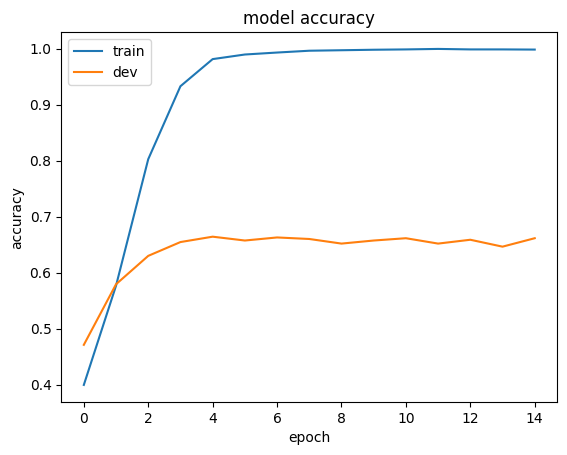

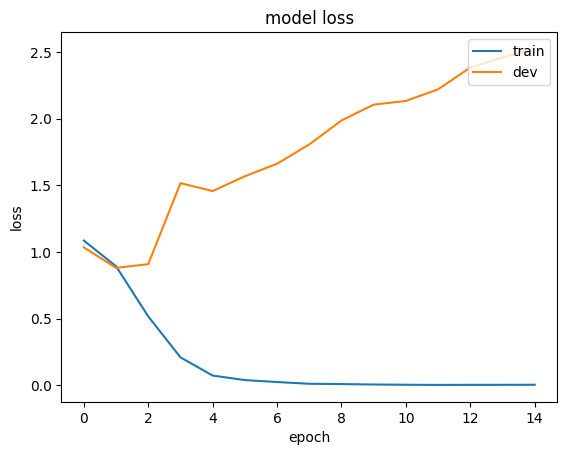

In [ ]:
# Plotting the training and validation metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Plot accuracy and loss
plt.plot(history_multi_cnn.history['categorical_accuracy'])
plt.plot(history_multi_cnn.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

plt.plot(history_multi_cnn.history['loss'])
plt.plot(history_multi_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [ ]:
# Evaluate model on test data
predictions = np.argmax(multi_cnn.predict(test_data), -1)

# Create a dictionary to map class labels to class names
label_to_name = {i: name for i, name in enumerate(pd.get_dummies(y_test).columns)}

# Replace integer class labels in predictions with class names
predictions_with_names = [label_to_name[label] for label in predictions]

print(predictions_with_names)

print(classification_report(y_test, predictions_with_names))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
['negative', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'posit

## Hyperparameter Tuning

We will use Keras Tuner to find the optimal hyperparameters for our model. The following code sets up the tuner and performs the search.

In [ ]:
!pip install keras_tuner

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Model building function
def build_model(hp):
    FILTERS = hp.Int('filters', min_value=32, max_value=256, step=32)
    DROPOUT_RATE = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)

    inputs = Input(shape=(1,), dtype=tf.string)
    inputs_seq = vectorizer(inputs)
    embeddings = Embedding(MAX_WORDS, EMBEDDING_DIM, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_length=MAX_SEQUENCE_LENGTH, trainable=False)(inputs_seq)
    dropped_embeddings = Dropout(rate=DROPOUT_RATE)(embeddings)

    pooled_convs = []
    filter_sizes = [2, 3, 4]
    for n_gram in filter_sizes:
        convs = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1, padding="valid", activation='relu', name='{}-gram_Convolutions'.format(n_gram))(dropped_embeddings)
        convs2 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1, padding="valid", activation='relu', name='{}-gram_Convolutions_2'.format(n_gram))(convs)
        convs3 = Conv1D(filters=FILTERS, kernel_size=n_gram, strides=1, padding="valid", activation='relu', name='{}-gram_Convolutions_3'.format(n_gram))(convs2)
        pooled_convs.append(GlobalMaxPooling1D(name='{}-gram_MaxPool'.format(n_gram))(convs3))

    concat = concatenate(pooled_convs)
    concat = Dropout(rate=DROPOUT_RATE)(concat)
    outputs = Dense(len(y_train.unique()), activation='softmax')(concat)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), metrics=["categorical_accuracy"])

    return model

In [ ]:
import keras_tuner as kt

train_data = np.array([[" ".join(x_train)] for x_train in X_train])
val_data = np.array([[" ".join(x_val)] for x_val in X_val])
test_data = np.array([[" ".join(x_test)] for x_test in X_test])

train_data = tf.convert_to_tensor(train_data, dtype=tf.string)
val_data = tf.convert_to_tensor(val_data, dtype=tf.string)
test_data = tf.convert_to_tensor(test_data, dtype=tf.string)

# Hyperparameter tuning
tuner = kt.Hyperband(build_model, objective='val_categorical_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='hyperparam_tuning')

early_stopping = EarlyStopping(patience=10, verbose=2, monitor="val_f1", mode="max", restore_best_weights=True)
tuner.search(train_data, y_train_1_hot, validation_data=(val_data, y_val_1_hot), epochs=20, callbacks=[Metrics(valid_data=(val_data, y_val_1_hot)), early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]
history_multi_cnn = best_model.fit(train_data, y_train_1_hot, validation_data=(val_data, y_val_1_hot), batch_size=128, epochs=20, shuffle=True, callbacks=[Metrics(valid_data=(val_data, y_val_1_hot)), early_stopping])

Reloading Tuner from my_dir\hyperparam_tuning\tuner0.json



C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20


C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step  - categorical_accuracy: 0.9557 -
 — val_f1: 0.741397 — val_precision: 0.740810 — val_recall: 0.742466
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - categorical_accuracy: 0.9556 - loss: 0.1429 - val_categorical_accuracy: 0.7425 - val_loss: 0.9306 - val_f1: 0.7414 - val_recall: 0.7425 - val_precision: 0.7408
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/stepp - categorical_accuracy: 0.9601 - 
 — val_f1: 0.726503 — val_precision: 0.730735 — val_recall: 0.728767
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - categorical_accuracy: 0.9601 - loss: 0.1171 - val_categorical_accuracy: 0.7288 - val_loss: 0.9686 - val_f1: 0.7265 - val_recall: 0.7288 - val_precision: 0.7307
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/stepp - categorical_accuracy: 0.9661 - 
 — val_f1: 0.714186 — val_precision: 0.718851 — val_recall: 0.719178
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - categorical_accuracy: 0.9662 - loss: 0.1020 - val_categorical_accuracy: 0.7192 - val_loss: 1.08

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of filters: {best_hyperparameters.get('filters')}")
print(f"Optimal dropout rate: {best_hyperparameters.get('dropout_rate')}")
print(f"Optimal learning rate: {best_hyperparameters.get('learning_rate')}")

Optimal number of filters: 192
Optimal dropout rate: 0.4
Optimal learning rate: 0.001


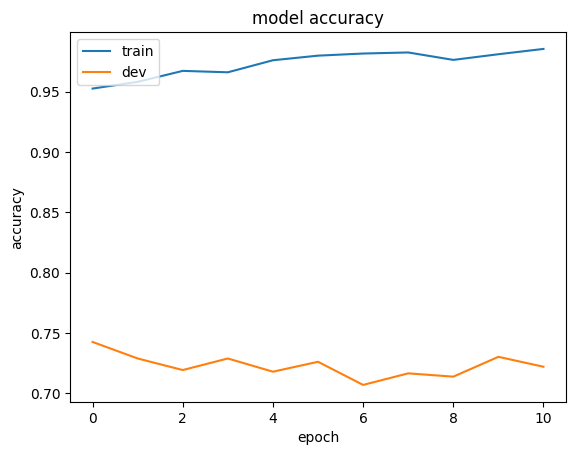

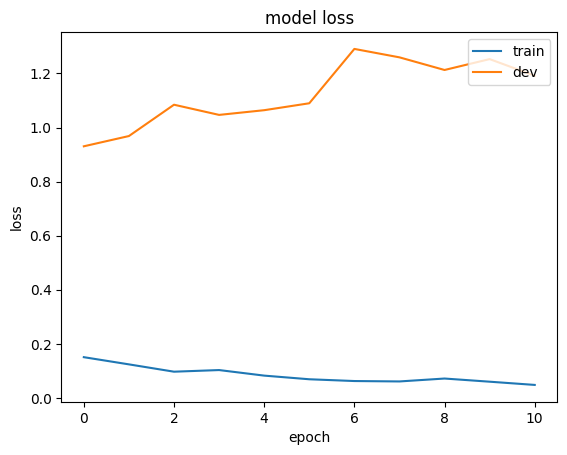

In [ ]:

# Plot accuracy and loss
plt.plot(history_multi_cnn.history['categorical_accuracy'])
plt.plot(history_multi_cnn.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

plt.plot(history_multi_cnn.history['loss'])
plt.plot(history_multi_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

## Best CNN model

In [ ]:
# Evaluate model on test data
predictions = np.argmax(multi_cnn.predict(test_data), -1)

# Create a dictionary to map class labels to class names
label_to_name = {i: name for i, name in enumerate(pd.get_dummies(y_test).columns)}

# Replace integer class labels in predictions with class names
predictions_with_names = [label_to_name[label] for label in predictions]


print(classification_report(y_test, predictions_with_names))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

    negative       0.58      0.66      0.62       221
     neutral       0.63      0.57      0.60       273
    positive       0.77      0.76      0.76       237

    accuracy                           0.66       731
   macro avg       0.66      0.66      0.66       731
weighted avg       0.66      0.66      0.66       731

